In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

First let's try to use sklearn's LinearRegression model.

In [20]:
df = pd.read_csv("USA_Housing.csv")
df[:10]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [21]:
X = df.iloc[:, :5]
Y = df.iloc[:, 5:6]
print(X.shape)
print(Y.shape)


(5000, 5)
(5000, 1)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, Y_train)

LinearRegression()

In [27]:
y_predicted = model.predict(X_test)

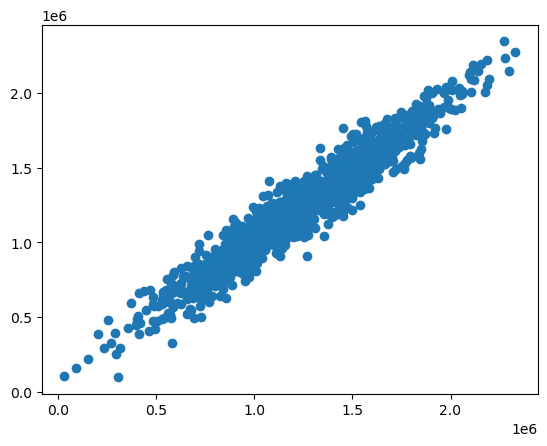

In [28]:
plt.scatter(Y_test, y_predicted)

In [29]:
model.score(X_test, Y_test)

0.9185060945363621

Let's try to implement it ourselves using numpy only and see if we can do better!

In [30]:
class LrModel:
    def __init__(self, input_features):
        self.B = np.ones((input_features+1, 1))
    def train(self, X_train, Y_train, epochs, learning_rate):
        N = Y_train.shape[0]
        ones_column = np.ones((X_train.shape[0],1))
        X_train_with1 = np.hstack((X_train, ones_column))
        SET = []
        for i in range(epochs):
            Ypred = X_train_with1 @ self.B
            self.B += (-learning_rate)*(X_train_with1.T)@((Ypred-Y_train)/N)
            SE = (1/(2*N))*(Ypred - np.array(Y_train))**2
            SET.append((i, np.sqrt(SE.mean())))
        return SET
            
    def predict(self, X_test):
        ones_column = np.ones((X_test.shape[0],1))
        X_test_with1 = np.hstack((X_test, ones_column))
        Ypred_test = X_test_with1 @ self.B
        return Ypred_test
    
    def r2score(self, Y_predicted, Y_actual):
        return r2_score(Y_predicted, Y_actual)
    def parameters(self):
        return self.B
    

0.9118925900272485


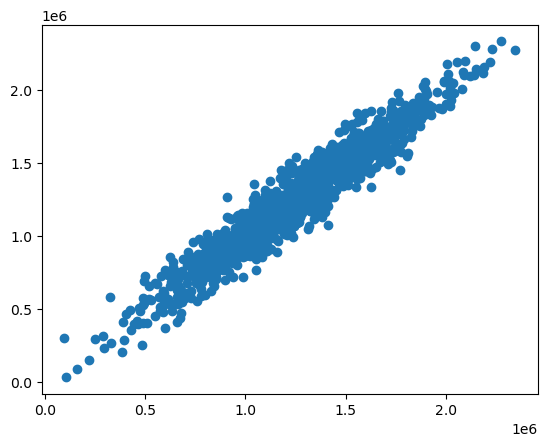

In [31]:
regr = LrModel(5)
TrainLoss = regr.train(X_train, Y_train, epochs=600, learning_rate=5e-2)
y_predicted = regr.predict(X_test)
print(regr.r2score(y_predicted, Y_test))
#print(regr.parameters())
plt.scatter(y_predicted, Y_test)

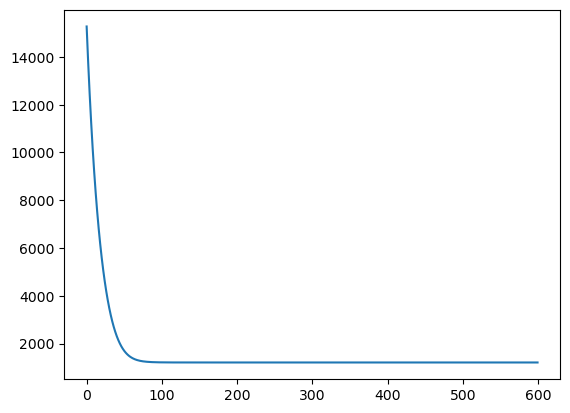

In [32]:
x_coords, y_coords = zip(*TrainLoss)
plt.plot(x_coords, y_coords)


In [33]:
print(regr.parameters())
print('-'*30)
print(model.coef_)
print(model.intercept_)

[[ 228969.81183727]
 [ 161540.13636371]
 [ 121467.57590583]
 [   1621.74847051]
 [ 151077.09396613]
 [1228190.25983778]]
------------------------------
[[228969.81200101 161540.13671731 121467.58123584   1621.74313288
  151077.09352959]]
[1228190.25983783]


In [34]:
print("Sklearn LinearRegression model's score:", model.score(X_test, Y_test))
print("Our from scratch model score: ", regr.r2score(y_predicted, Y_test))

Sklearn LinearRegression model's score: 0.9185060945363621
Our from scratch model score:  0.9118925900272485


We essentially learned the same line as apparent from the parameters. The scores are also almost the same!
lrs and epochs were hand chosen based on the train loss vs epoch curve. We also faced loss explosion and fixed it by scaling the inputs.